Analysis:
1>More Cities towards North pole than South pole
2>Lot of cities with High Humidity North and South of the equator, big spectrum even though the temperature varies
3>This time of the year more cities with clear skies and less wind

In [1]:
#import statements 
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import openweathermapy.core as ow 
import numpy as np
import  urllib
from config import api_key
from datetime import datetime

In [2]:
#get 2000 uniform longtitude and latitude values 
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)

# get city list using above lat and long values via citipy.nearest_city
cities_list = []

for x in range(len(lats)):
    city = citipy.nearest_city(lats[x], lngs[x])
    if city.city_name not in cities_list:
        cities_list.append(city.city_name)
        


In [3]:
#for  openweathermapy set static URL settings
settings = {"units": "imperial", "appid": api_key}

#loop through cities to get weather for 500 cities using openweathermapy

weather_data = []

print("Begining Data Retrieval")
print("=======================")
for key,city in enumerate(cities_list):
    try:
        print(f'Processing Record {key} | {city}')
        weather_data.append(ow.get_current(city, **settings))
        if (len(weather_data) == 500):
           break
    #if weather for city not found skip city and process next city
    except urllib.error.HTTPError as e:
        print("Weather for City " + city + " Not Found")
        continue
print("=======================")
print("Data Retrieval Complete")
print("=======================")

Begining Data Retrieval
Processing Record 0 | rikitea
Processing Record 1 | neuquen
Processing Record 2 | taolanaro
Processing Record 3 | dikson
Processing Record 4 | port elizabeth
Processing Record 5 | avarua
Processing Record 6 | illoqqortoormiut
Weather for City illoqqortoormiut Not Found
Processing Record 7 | nizhneyansk
Processing Record 8 | new norfolk
Processing Record 9 | roald
Processing Record 10 | hermanus
Processing Record 11 | saskylakh
Processing Record 12 | montceau-les-mines
Processing Record 13 | khandyga
Processing Record 14 | santa luzia
Processing Record 15 | tomatlan
Processing Record 16 | katsuura
Processing Record 17 | bredasdorp
Processing Record 18 | yuzhno-yeniseyskiy
Weather for City yuzhno-yeniseyskiy Not Found
Processing Record 19 | butaritari
Processing Record 20 | clyde river
Processing Record 21 | luderitz
Processing Record 22 | weener
Processing Record 23 | jamestown
Processing Record 24 | east london
Processing Record 25 | mataura
Processing Record 26

Processing Record 225 | bouca
Processing Record 226 | faanui
Processing Record 227 | hami
Processing Record 228 | chinsali
Processing Record 229 | saint-philippe
Processing Record 230 | abu samrah
Processing Record 231 | saint anthony
Processing Record 232 | auki
Processing Record 233 | lata
Processing Record 234 | burshtyn
Processing Record 235 | awjilah
Processing Record 236 | buchanan
Processing Record 237 | menongue
Processing Record 238 | gardan diwal
Weather for City gardan diwal Not Found
Processing Record 239 | galveston
Processing Record 240 | krasnoselkup
Processing Record 241 | bako
Processing Record 242 | saint-ambroise
Processing Record 243 | edmonds
Processing Record 244 | piacabucu
Processing Record 245 | broome
Processing Record 246 | codrington
Processing Record 247 | zeya
Processing Record 248 | grand gaube
Processing Record 249 | salalah
Processing Record 250 | mujiayingzi
Processing Record 251 | toftir
Weather for City toftir Not Found
Processing Record 252 | alekse

Processing Record 450 | olafsvik
Weather for City olafsvik Not Found
Processing Record 451 | idritsa
Processing Record 452 | kondinskoye
Processing Record 453 | sao goncalo dos campos
Processing Record 454 | mangulile
Processing Record 455 | gamba
Processing Record 456 | plaster rock
Processing Record 457 | ornskoldsvik
Processing Record 458 | kambove
Processing Record 459 | deniliquin
Processing Record 460 | tymovskoye
Processing Record 461 | platanos
Processing Record 462 | acajutla
Processing Record 463 | kirakira
Processing Record 464 | cockburn town
Processing Record 465 | praia da vitoria
Processing Record 466 | springbok
Processing Record 467 | burica
Processing Record 468 | calamar
Processing Record 469 | batemans bay
Processing Record 470 | aksum
Processing Record 471 | forli
Processing Record 472 | wau
Processing Record 473 | bowen
Processing Record 474 | wamba
Processing Record 475 | makakilo city
Processing Record 476 | amapa
Processing Record 477 | atbasar
Processing Recor

In [4]:
#using openweathermapy retrieve listed dictionary attributes
summary = ["name","clouds.all", "sys.country", "dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]

data = [response(*summary) for response in weather_data]



In [5]:
# Create a Pandas DataFrame with the results
column_names = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

df_weather_data = pd.DataFrame(data,  columns=column_names)

df_weather_data.count()



City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Lat           500
Lng           500
Max Temp      500
Wind Speed    500
dtype: int64

In [6]:

df_weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,56,PF,1511049980,100,-23.12,-134.97,73.43,17.47
1,Neuquen,0,AR,1511046000,40,-38.95,-68.06,69.80,17.22
2,Amparihy,75,MG,1511046000,88,-25.02,46.97,71.60,6.17
3,Dikson,20,RU,1511049981,100,73.51,80.55,-2.99,12.77
4,Port Elizabeth,0,ZA,1511046000,93,-33.92,25.57,55.40,5.82


In [7]:
df_weather_data.to_csv("WeatherData", encoding='utf-8',index=False)

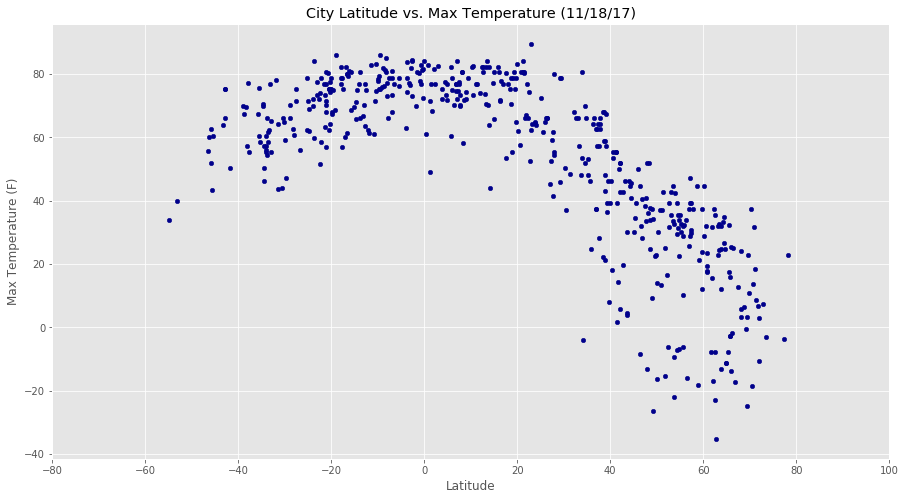

In [8]:
dt_display = datetime.today().strftime("%m/%d/%y")
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Max Temp",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Max Temperature (" + dt_display  + ")")
plt.savefig("City_Lat_vs_Max_tmp.png")
plt.show()

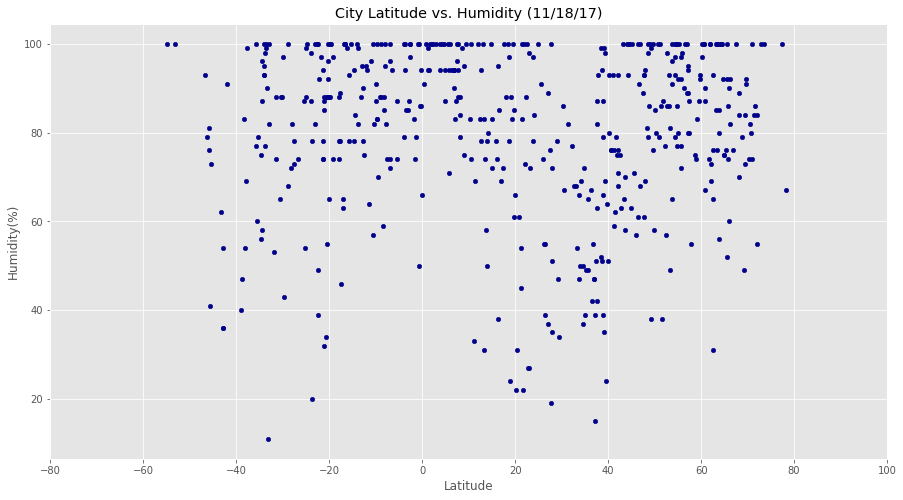

In [9]:
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Humidity",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Humidity (" + dt_display + ")")
plt.savefig("City_Lat_vs_Humidity.png")
plt.show()

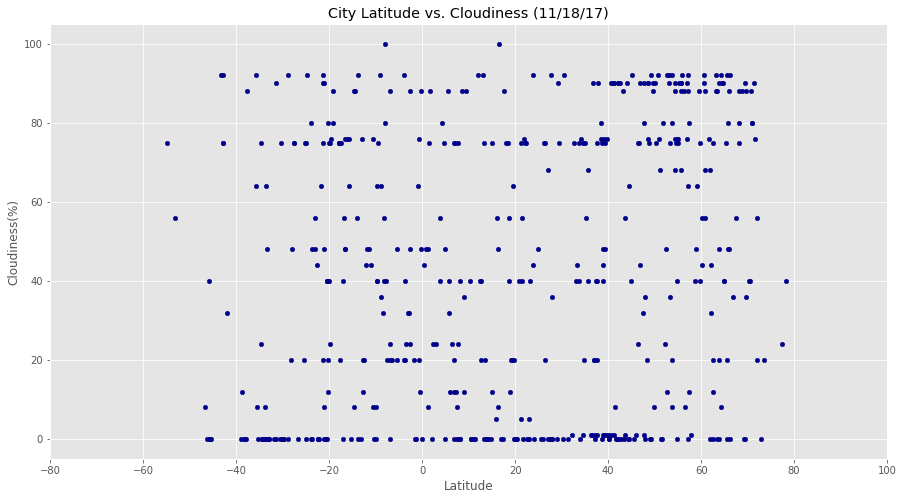

In [10]:
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Cloudiness",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Cloudiness (" + dt_display + ")")
plt.savefig("City_Lat_vs_Cloudiness.png")
plt.show()

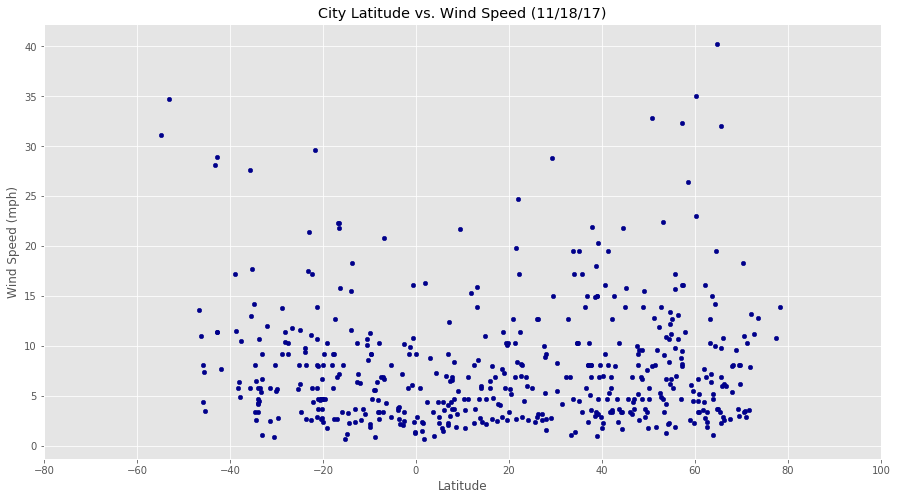

In [11]:
df_weather_data.plot(kind="scatter",x="Lat",y="Wind Speed",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Wind Speed (" + dt_display + ")")
plt.savefig("City_Lat_vs_Wind_Speed.png")
plt.show()